# Loading crude oil data and calculation EMAs

In [1]:
install.packages("lubridate")
library(lubridate)
library(quantmod)
library(tidyverse)
library(plyr); library(dplyr)


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpYDIZzS/downloaded_packages



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filte

In [2]:
# Load the data
price <- read.csv("data/wtiDaily.csv")
head(price)

,X7.13.2016,X53.48,X53.61,X51.46,X51.65
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,7/14/2016,52.04,52.70,51.85,52.58
2,7/15/2016,52.42,53.23,51.95,52.85
3,7/18/2016,53.03,53.04,51.74,52.14
4,7/19/2016,52.13,52.58,51.48,51.65
5,7/20/2016,51.62,52.33,50.75,51.95
6,7/21/2016,51.85,52.29,50.72,50.95


In [3]:
setup_data <- function(pricedata) {
    names(pricedata) <- c("Date", "Open", "High", "Low", "Close")
    dates <- parse_date_time(x = pricedata[,1], "mdy_HM", truncated = 3)
    pricedata <- pricedata[,2:5]
    pricedata <- xts(pricedata, order.by = dates)
}

In [4]:
price <- setup_data(price)

In [5]:
head(price)

Warning message:
“timezone of object (UTC) is different than current timezone ().”


            Open  High   Low Close
2016-07-14 52.04 52.70 51.85 52.58
2016-07-15 52.42 53.23 51.95 52.85
2016-07-18 53.03 53.04 51.74 52.14
2016-07-19 52.13 52.58 51.48 51.65
2016-07-20 51.62 52.33 50.75 51.95
2016-07-21 51.85 52.29 50.72 50.95

In [6]:
summary(price)

     Index                          Open            High            Low       
 Min.   :2016-07-14 00:00:00   Min.   :42.66   Min.   :43.31   Min.   :42.16  
 1st Qu.:2017-01-20 00:00:00   1st Qu.:49.77   1st Qu.:50.40   1st Qu.:49.06  
 Median :2017-07-31 00:00:00   Median :54.55   Median :55.42   Median :54.01  
 Mean   :2017-07-30 05:24:28   Mean   :55.66   Mean   :56.34   Mean   :54.95  
 3rd Qu.:2018-02-07 00:00:00   3rd Qu.:61.15   3rd Qu.:61.84   3rd Qu.:60.44  
 Max.   :2018-08-15 00:00:00   Max.   :73.45   Max.   :74.37   Max.   :72.75  
     Close      
 Min.   :42.64  
 1st Qu.:49.77  
 Median :54.73  
 Mean   :55.68  
 3rd Qu.:61.12  
 Max.   :73.43  

In [7]:
ema7 <- EMA(price$Close, n= 7)  # Exponential Moving Average
ema20 <- EMA(price$Close, n=20) # Exponential Moving Average

In [8]:
tail(ema7)

Warning message:
“timezone of object (UTC) is different than current timezone ().”


                EMA
2018-08-08 68.39387
2018-08-09 67.99790
2018-08-10 67.90593
2018-08-13 67.72944
2018-08-14 67.55708
2018-08-15 66.86031

In [9]:
tail(ema20)

Warning message:
“timezone of object (UTC) is different than current timezone ().”


                EMA
2018-08-08 68.79087
2018-08-09 68.60222
2018-08-10 68.50963
2018-08-13 68.38490
2018-08-14 68.25681
2018-08-15 67.92474

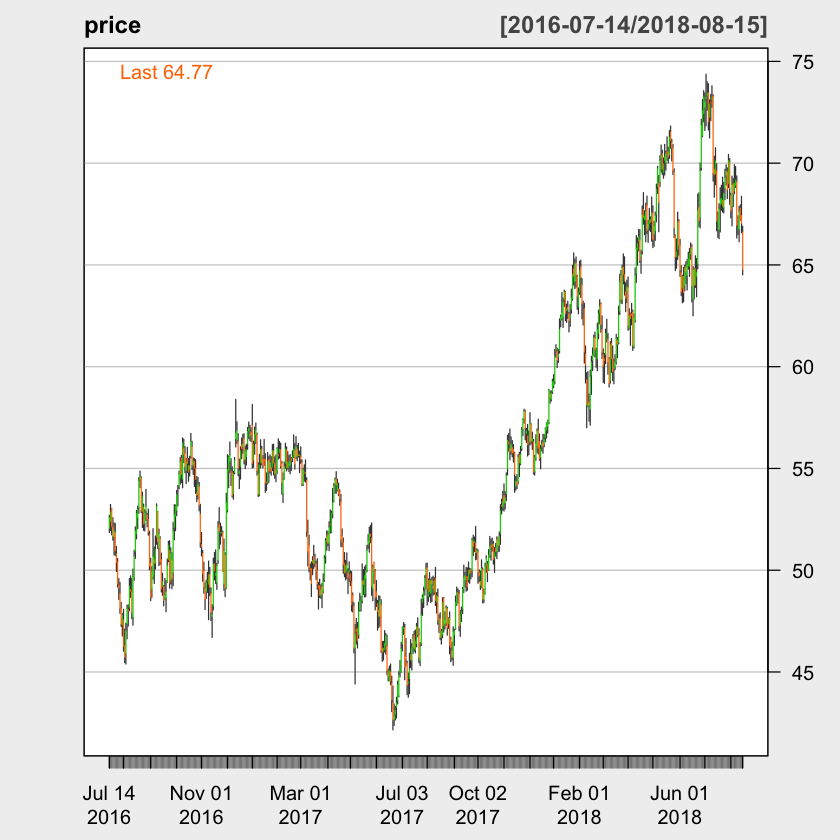

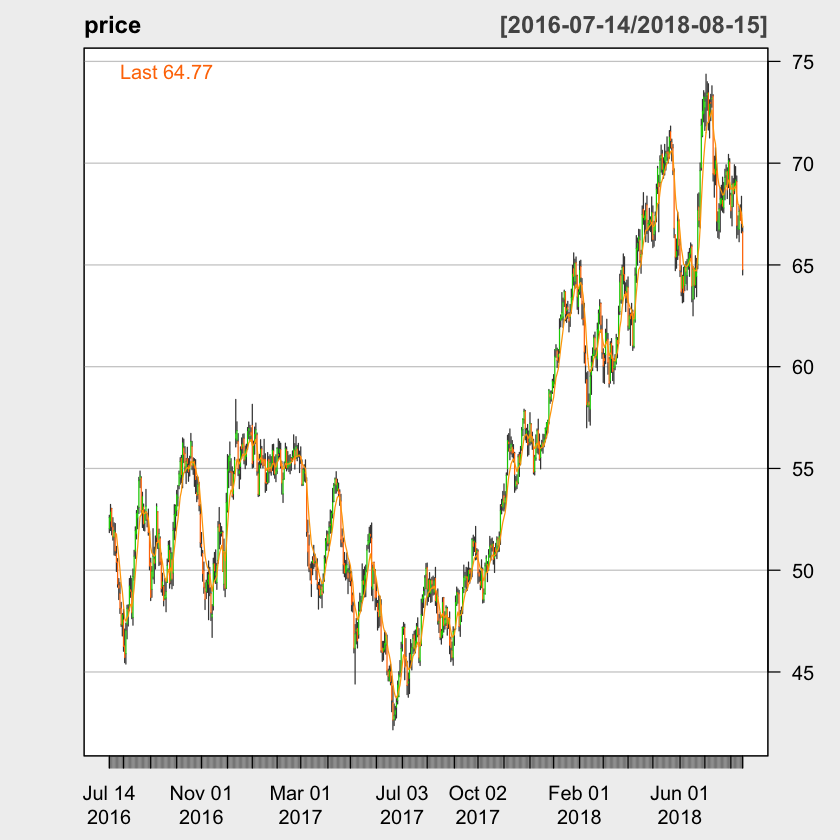

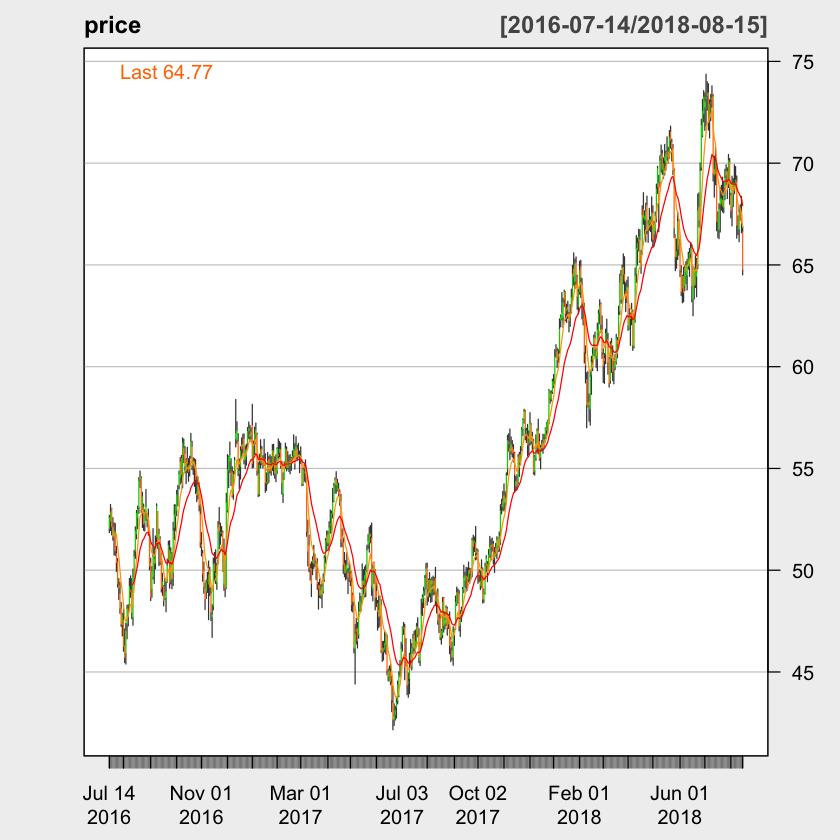

In [10]:
# Plotting the data
chartSeries(price, theme = "white")
addEMA( n=7, col="orange")
addEMA( n=20, col="red")

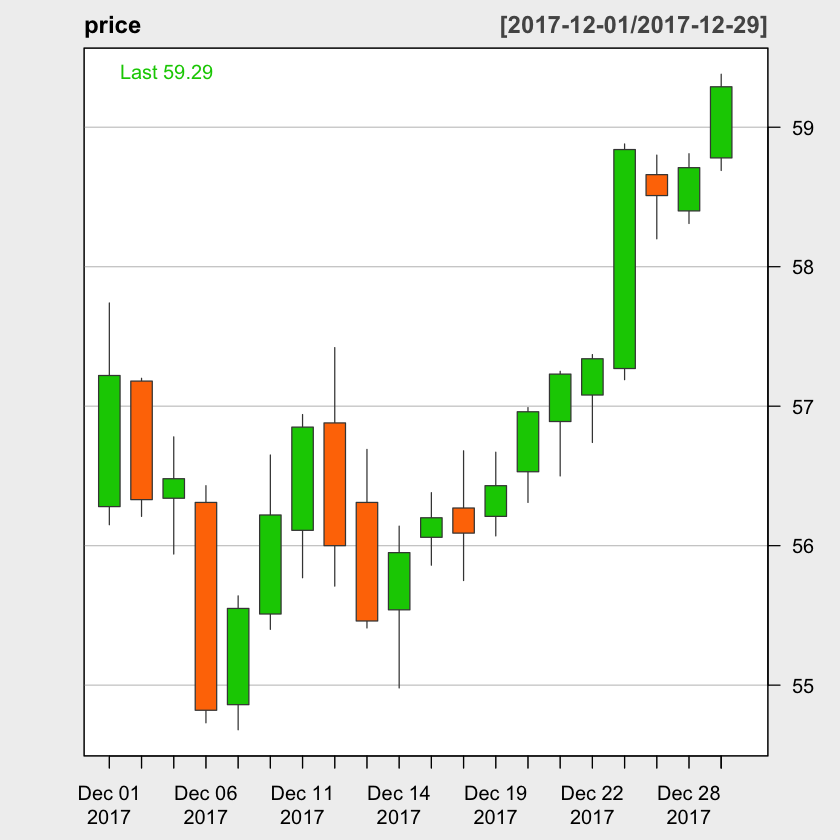

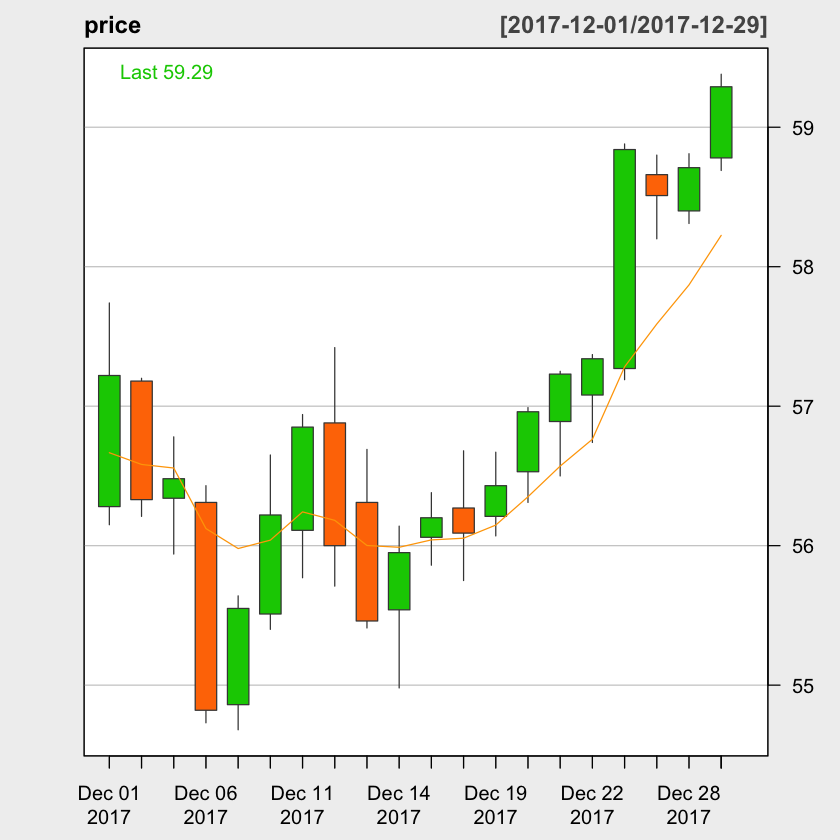

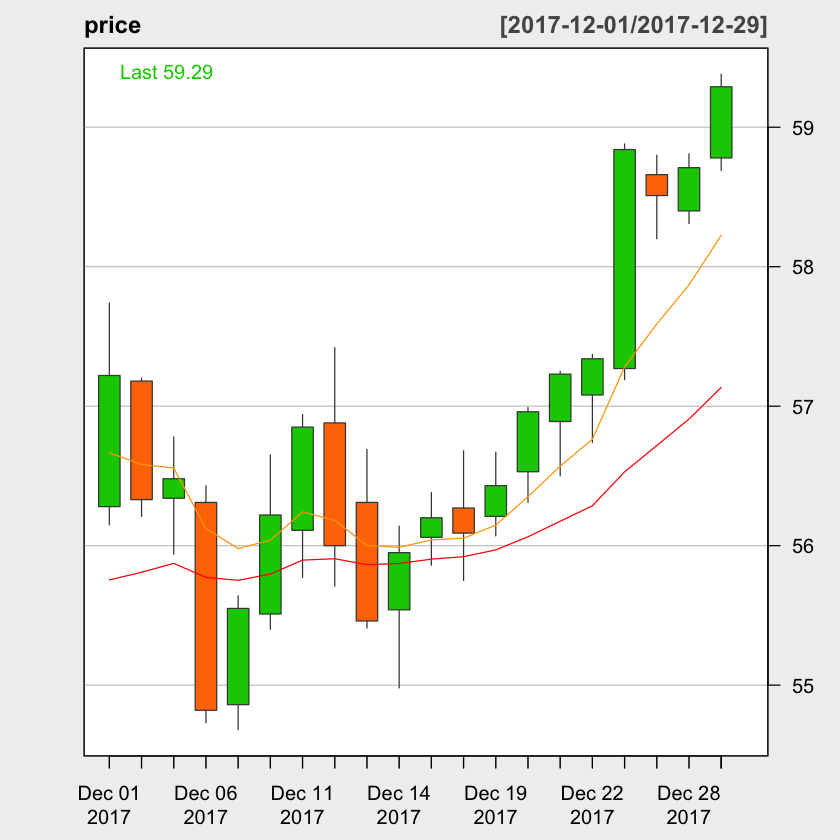

In [11]:
# Plotting the data
chartSeries(price, subset="2017-12", theme = "white")
addEMA( n=7, col="orange")
addEMA( n=20, col="red")

In [12]:
# Feature engineering
candle.type.current <- data.frame(ifelse(price$Close > price$Open, "bull", "bear"))
head(candle.type.current)

,Close
,<chr>
2016-07-14,bull
2016-07-15,bull
2016-07-18,bear
2016-07-19,bear
2016-07-20,bull
2016-07-21,bear


In [13]:
candle.type.previous <- data.frame(lag(candle.type.current$Close, n=1))  #  shifting the time base back by a given number of observations. 
head(candle.type.previous)

,lag.candle.type.current.Close..n...1.
,<chr>
1,NA
2,bull
3,bull
4,bear
5,bear
6,bull


In [14]:
candle.next.day <- data.frame(lead(candle.type.current$Close, n=1)) #  shifting the time base forward by a given number of observations. 
head(candle.next.day)

,lead.candle.type.current.Close..n...1.
,<chr>
1,bull
2,bear
3,bear
4,bull
5,bear
6,bear


In [15]:
doji <- data.frame(ifelse(abs(price$Close - price$Open) < 0.45, "yes", "no"))
head(doji)

,Close
,<chr>
2016-07-14,no
2016-07-15,yes
2016-07-18,no
2016-07-19,no
2016-07-20,yes
2016-07-21,no


In [16]:
position.to.ema7 <- data.frame(ifelse(price$Close > ema7, "above", "below"))
tail(position.to.ema7)

,Close
,<chr>
2018-08-08,below
2018-08-09,below
2018-08-10,below
2018-08-13,below
2018-08-14,below
2018-08-15,below


In [17]:
position.to.ema20 <- data.frame(ifelse(price$Close > ema20, "above", "below"))
tail(position.to.ema20)

,Close
,<chr>
2018-08-08,below
2018-08-09,below
2018-08-10,below
2018-08-13,below
2018-08-14,below
2018-08-15,below


In [18]:
ema7.to.ema20 <- data.frame(ifelse(ema7 > ema20, "above", "below"))

In [19]:
daily.return <- data.frame(abs(price$Close - price$Open))
nextday.return <- lead(daily.return, n=1)
head(nextday.return)

,Close
,<dbl>
2016-07-15,0.43
2016-07-18,0.89
2016-07-19,0.48
2016-07-20,0.33
2016-07-21,0.90
2016-07-22,0.41


In [20]:
# Making up the dataframe with all the features as columns
clData <- data.frame(candle.type.current, candle.type.previous,
                    doji, position.to.ema7, position.to.ema20, ema7.to.ema20,
                    daily.return, nextday.return, candle.next.day)
tail(clData)

,Close,lag.candle.type.current.Close..n...1.,Close.1,Close.2,Close.3,EMA,Close.4,Close.5,lead.candle.type.current.Close..n...1.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2018-08-08,bear,bull,no,below,below,below,2.15,0.02,bull
2018-08-09,bull,bear,yes,below,below,below,0.02,0.89,bull
2018-08-10,bull,bull,no,below,below,below,0.89,0.58,bear
2018-08-13,bear,bull,no,below,below,below,0.58,0.38,bear
2018-08-14,bear,bear,yes,below,below,below,0.38,1.85,bear
2018-08-15,bear,bear,no,below,below,below,1.85,NA,NA


In [21]:
# naming the dataframe columns
names(clData) <- c("candle.type.current", "candle.type.previous",
                  "doji", "position.to.ema7", "position.to.ema20",
                  "ema7.to.ema20", "daily.return", "nextday.return",
                  "candle.next.day")

head(clData)

,candle.type.current,candle.type.previous,doji,position.to.ema7,position.to.ema20,ema7.to.ema20,daily.return,nextday.return,candle.next.day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2016-07-14,bull,NA,no,NA,NA,NA,0.54,0.43,bull
2016-07-15,bull,bull,yes,NA,NA,NA,0.43,0.89,bear
2016-07-18,bear,bull,no,NA,NA,NA,0.89,0.48,bear
2016-07-19,bear,bear,no,NA,NA,NA,0.48,0.33,bull
2016-07-20,bull,bear,yes,NA,NA,NA,0.33,0.90,bear
2016-07-21,bear,bull,no,NA,NA,NA,0.90,0.41,bear


In [22]:
# Feature engineering - Training and testing
clData <- slice(clData, 21:length(clData$doji))
head(clData)

,candle.type.current,candle.type.previous,doji,position.to.ema7,position.to.ema20,ema7.to.ema20,daily.return,nextday.return,candle.next.day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2016-08-11,bull,bear,no,above,above,below,2.01,1.03,bull
2016-08-12,bull,bull,no,above,above,below,1.03,1.00,bull
2016-08-15,bull,bull,no,above,above,above,1.00,0.99,bull
2016-08-16,bull,bull,no,above,above,above,0.99,0.42,bull
2016-08-17,bull,bull,yes,above,above,above,0.42,1.31,bull
2016-08-18,bull,bull,no,above,above,above,1.31,0.16,bull


# Data Preparation for the ML

In [23]:
trainRange <- 1:300
testRange <- 300:516

train <- clData[trainRange,]
test <- clData[testRange,]

In [24]:
# Define a formula: target variables and predictors

target <- "candle.next.day"
predictors.var <- c("candle.type.current", "candle.type.previous",
                  "doji", "position.to.ema7", "position.to.ema20",
                  "ema7.to.ema20", "daily.return")

In [25]:
# Formula
# Target ~ Predictor1 + Predictor2 + Predictor3 ...

predictors.var <- paste(predictors.var, collapse = "+")
predictors.var

[1] "candle.type.current+candle.type.previous+doji+position.to.ema7+position.to.ema20+ema7.to.ema20+daily.return"

In [26]:
# Create a formula for a model (target) with a large number of variables (predictors):
formula <- as.formula(paste(target,"~", predictors.var, sep="")) 
formula

candle.next.day ~ candle.type.current + candle.type.previous + 
    doji + position.to.ema7 + position.to.ema20 + ema7.to.ema20 + 
    daily.return

# Classification based machine learning to predict the candle type of the following day

In [27]:
# Naive Bayes algorithm
library("naivebayes")

naivebayes 0.9.7 loaded



In [28]:
?naive_bayes

naive_bayes {naivebayes},R Documentation
x,matrix or dataframe with categorical (character/factor/logical) or metric (numeric) predictors.
y,class vector (character/factor/logical).
formula,"an object of class ""formula"" (or one that can be coerced to ""formula"") of the form: class ~ predictors (class has to be a factor/character/logical)."
data,matrix or dataframe with categorical (character/factor/logical) or metric (numeric) predictors.
prior,"vector with prior probabilities of the classes. If unspecified, the class proportions for the training set are used. If present, the probabilities should be specified in the order of the factor levels."
laplace,value used for Laplace smoothing (additive smoothing). Defaults to 0 (no Laplace smoothing).
usekernel,"logical; if TRUE, density is used to estimate the class conditional densities of metric predictors. This applies to vectors with class ""numeric"". For further details on interaction between usekernel and usepoisson parameters please see Note below."
usepoisson,"logical; if TRUE, Poisson distribution is used to estimate the class conditional PMFs of integer predictors (vectors with class ""integer"")."
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain NAs. By default (na.pass), missing values are not removed from the data and are then omited while constructing tables. Alternatively, na.omit can be used to exclude rows with at least one missing value before constructing tables."



================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = formula, data = train, usekernel = TRUE, 
    adjust = 1.5)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

     bear      bull 
0.4533333 0.5466667 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: candle.type.current (Bernoulli) 
--------------------------------------------------------------------------------- 
                   
candle.type.current      bear      bull
               bear 0.4485294 0.4512195
               bull 0.5514706 0.5487805

--------------------------------------------------------------------------------- 
 ::: candle.type.previous (Be


================================== Naive Bayes ================================== 
 
- Call: naive_bayes.formula(formula = formula, data = train, usekernel = TRUE,      adjust = 1.5) 
- Laplace: 0 
- Classes: 2 
- Samples: 300 
- Features: 7 
- Conditional distributions: 
    - Bernoulli: 6
    - KDE: 1
- Prior probabilities: 
    - bear: 0.4533
    - bull: 0.5467

--------------------------------------------------------------------------------- 


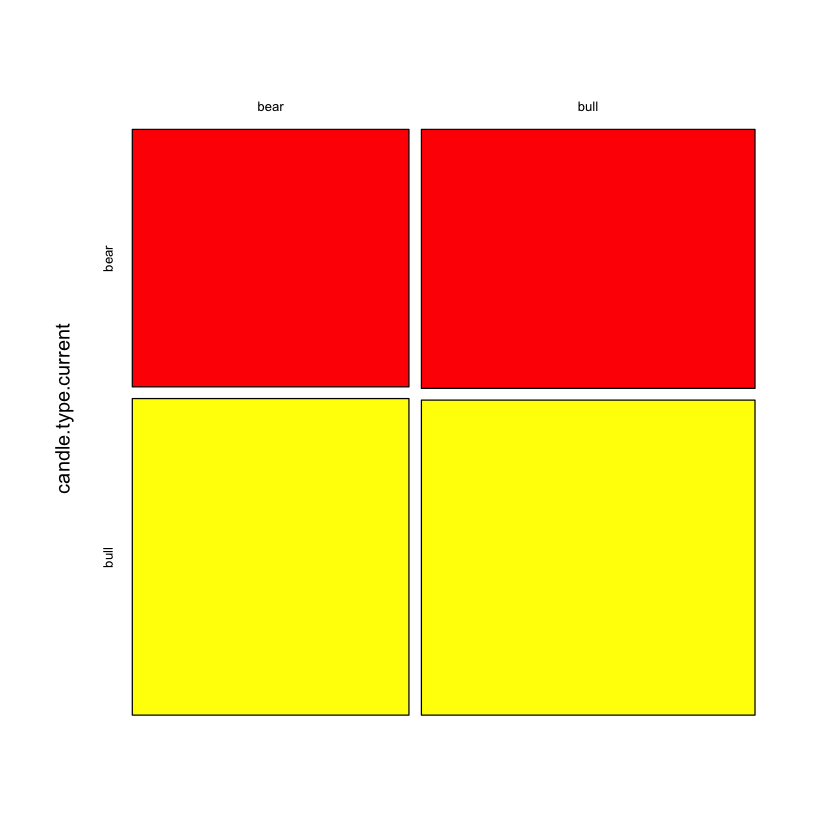

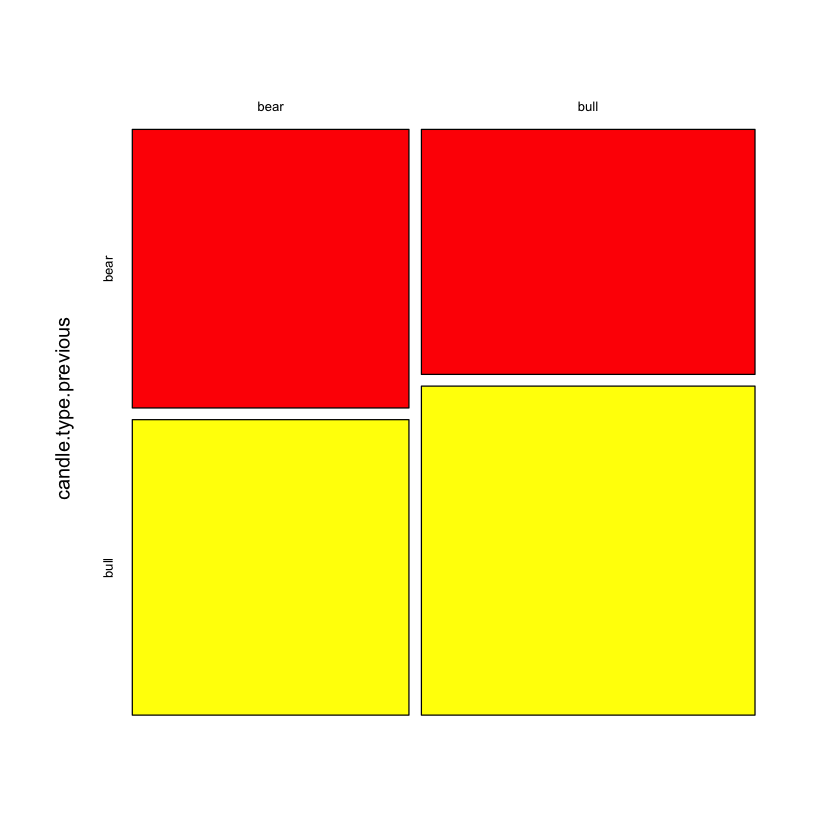

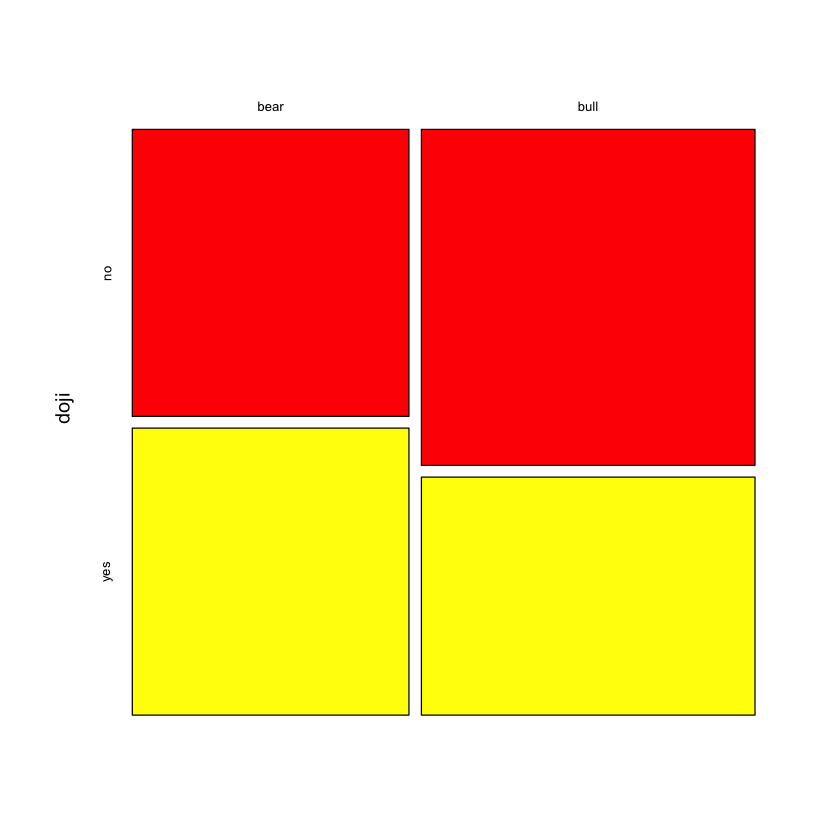

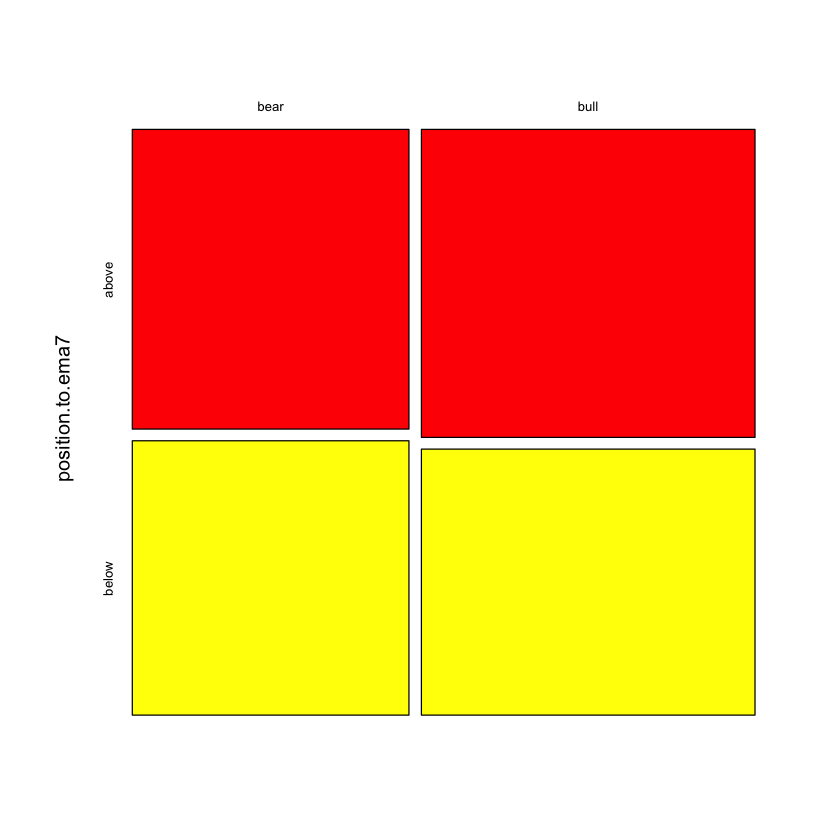

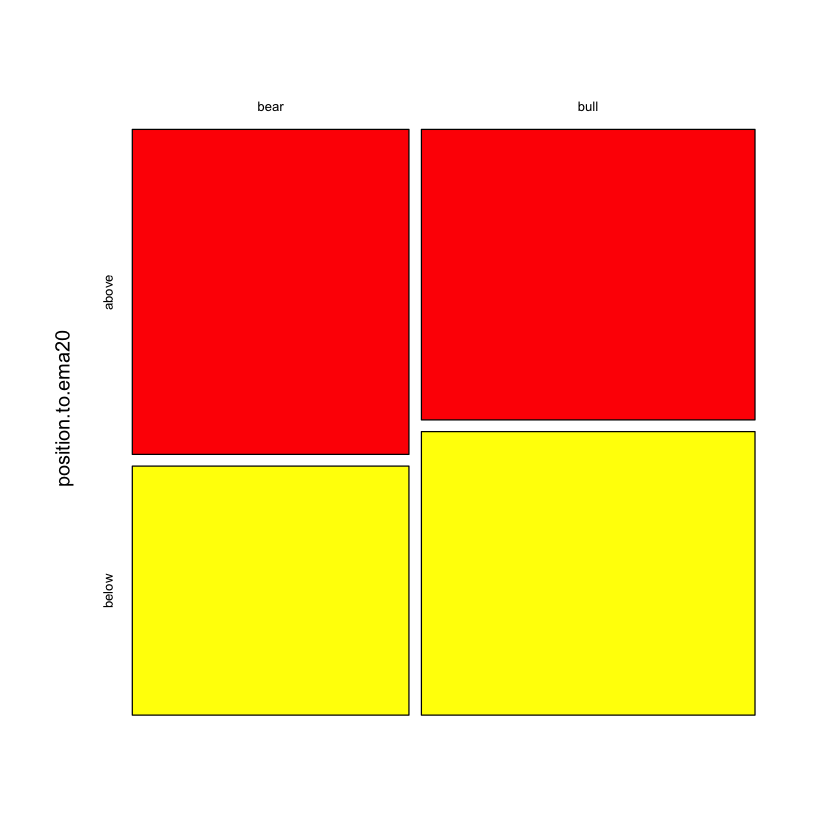

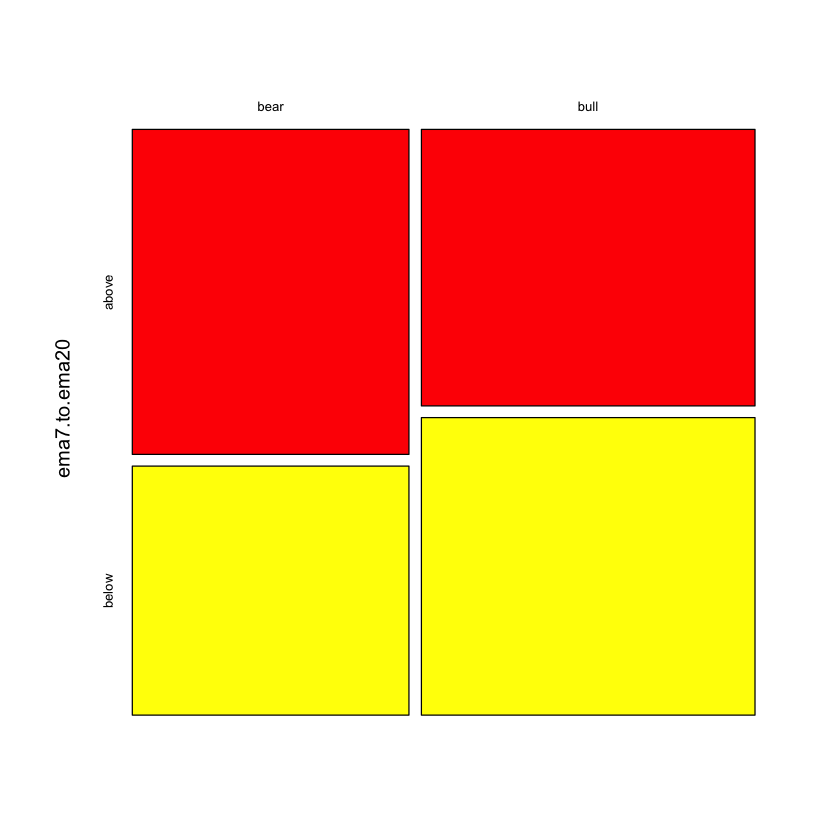

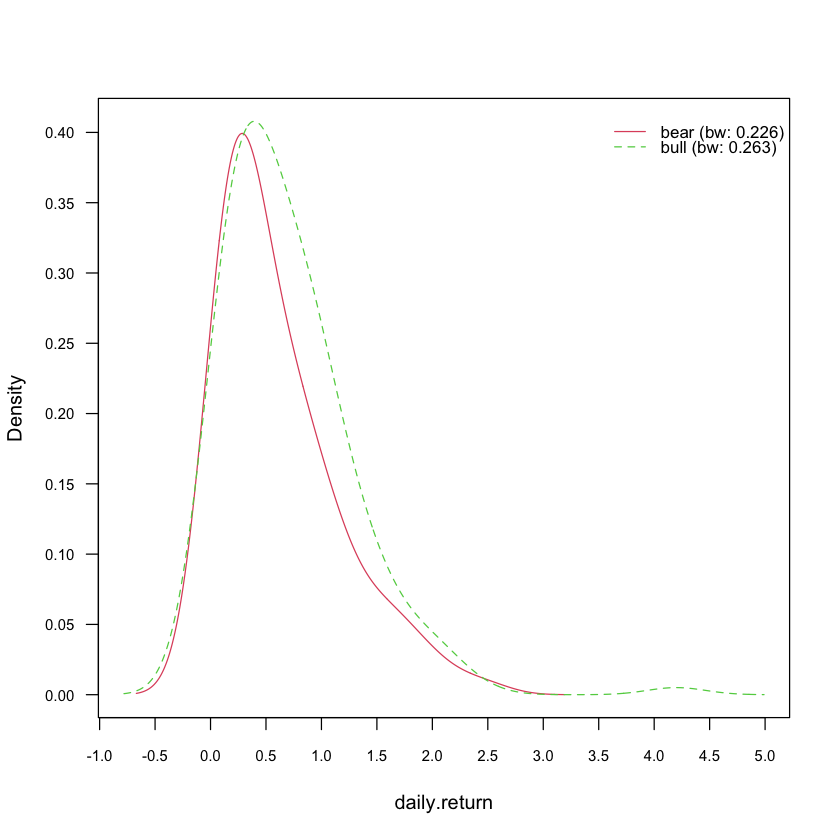

In [29]:
# naive bayes model
nb <- naive_bayes(formula, data = train, usekernel = TRUE, adjust = 1.5)
nb
summary(nb)
plot(nb)

In [30]:
# prediction
nb.pred <- predict(nb, test, type="class")
nb.pred

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


[1] bear bear bull bear bear bear bull bear bear bear bear bear bull bear bear
 [16] bear bear bull bull bear bear bear bear bear bull bear bear bull bear bear
 [31] bull bull bear bull bear bear bear bull bull bear bull bull bull bull bull
 [46] bull bear bear bear bear bear bear bear bull bear bear bull bear bull bear
 [61] bull bear bull bear bear bull bear bull bear bear bear bear bull bull bear
 [76] bull bull bull bull bull bull bull bear bull bull bull bear bull bull bull
 [91] bull bull bull bear bull bull bear bull bull bull bear bull bear bull bull
[106] bull bull bull bear bull bull bear bull bull bull bull bear bear bear bear
[121] bull bear bear bear bull bull bull bull bear bear bull bear bull bear bear
[136] bear bull bear bear bear bear bull bear bull bull bull bull bull bear bull
[151] bear bear bull bear bear bull bear bear bull bear bull bear bull bull bull
[166] bull bull bull bull bull bull bull bull bull bull bull bull bull bull bear
[181] bull bull bull bull bull bear bear bear bull bull bear bear bull bear bull
[196] bull bear bull bull bull bull bull bull bear bull bull bull bull bull bull
[211] bear bear bull bear bull bull bull
Levels: bear bull

In [31]:
# function for processing predictions
predictedReturn <- function(df, pred) {
    # df is the test data
    # pred is our prediction from the machine learning model
    df$pred <- pred
    df$predReturn <- ifelse(df$candle.next.day != df$pred, -df$nextday.return, df$nextday.return)
    df$cumReturn <- cumsum(df$predReturn)
    return(df)
}

In [32]:
nb.test <- predictedReturn(test, nb.pred)
head(nb.test)

,candle.type.current,candle.type.previous,doji,position.to.ema7,position.to.ema20,ema7.to.ema20,daily.return,nextday.return,candle.next.day,pred,predReturn,cumReturn
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
2017-10-11,bull,bull,yes,above,above,above,0.36,0.40,bear,bear,0.40,0.40
2017-10-12,bear,bull,yes,below,above,above,0.40,0.72,bull,bear,-0.72,-0.32
2017-10-13,bull,bear,no,above,above,above,0.72,0.44,bull,bull,0.44,0.12
2017-10-16,bull,bull,yes,above,above,above,0.44,0.09,bear,bear,0.09,0.21
2017-10-17,bear,bull,yes,above,above,above,0.09,0.09,bull,bear,-0.09,0.12
2017-10-18,bull,bear,yes,above,above,above,0.09,0.75,bear,bear,0.75,0.87


Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


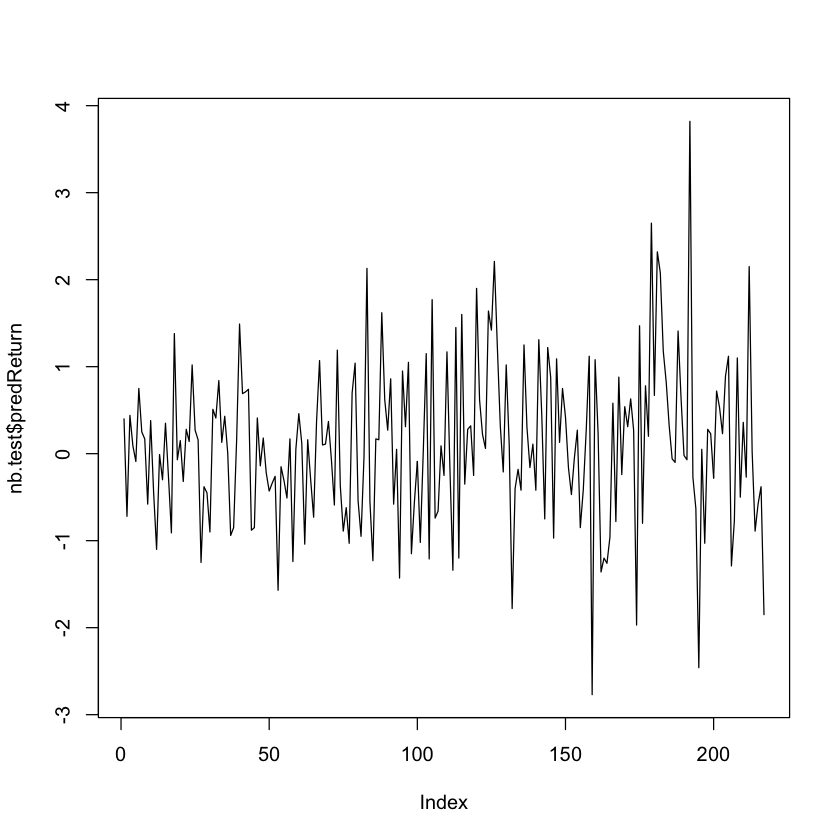

In [33]:
plot(nb.test$predReturn, type="line")  # Predictive Return

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


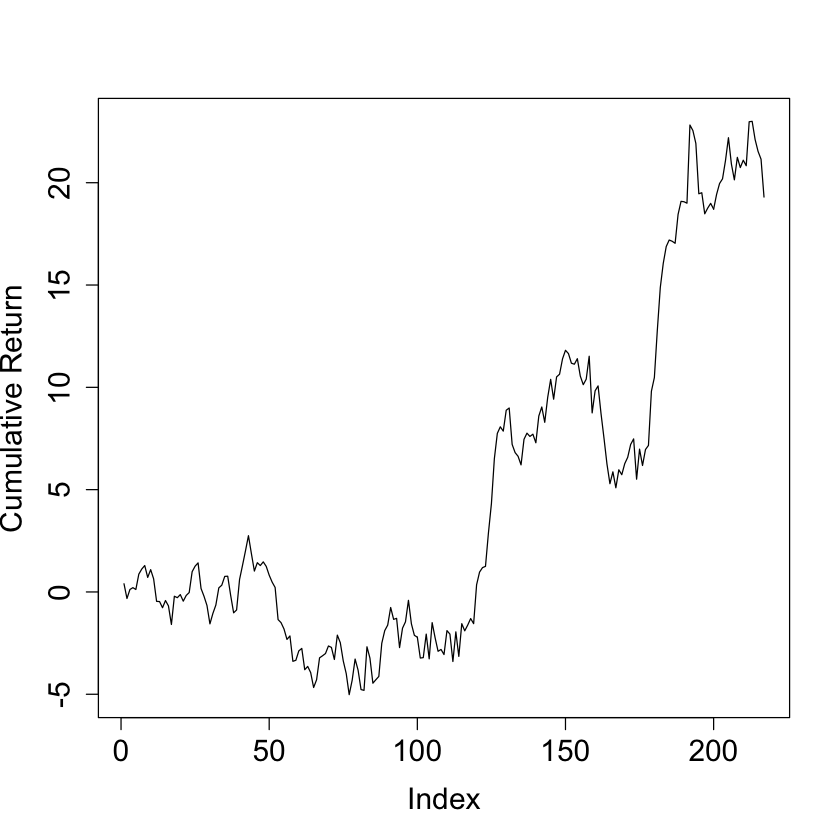

In [34]:
plot(nb.test$cumReturn, type="line",  # Cumulative Return
     ylab = "Cumulative Return", 
     cex.axis=1.5,
     cex.lab=1.5)

In [35]:
# Confusion Matrix
confusionmatrix.nb <- table(nb.test$candle.next.day, nb.test$pred)
print(confusionmatrix.nb)

      
       bear bull
  bear   44   47
  bull   51   75


In [36]:
# Calculating accuracy
nb.error <- mean(nb.test$candle.next.day != nb.test$pred)
paste("Accuracy:", 1 - nb.error)

[1] "Accuracy: 0.548387096774194"

# Support Vector Machines

In [37]:
library("e1071")

In [38]:
# svm model
help("svm")

svm {e1071},R Documentation
formula,a symbolic description of the model to be fit.
data,an optional data frame containing the variables in the model. By default the variables are taken from the environment which ‘svm’ is called from.
x,"a data matrix, a vector, or a sparse matrix (object of class Matrix provided by the Matrix package, or of class matrix.csr provided by the SparseM package, or of class simple_triplet_matrix provided by the slam package)."
y,a response vector with one label for each row/component of x. Can be either a factor (for classification tasks) or a numeric vector (for regression).
scale,"A logical vector indicating the variables to be scaled. If scale is of length 1, the value is recycled as many times as needed. Per default, data are scaled internally (both x and y variables) to zero mean and unit variance. The center and scale values are returned and used for later predictions."
type,"svm can be used as a classification machine, as a regression machine, or for novelty detection. Depending of whether y is a factor or not, the default setting for type is C-classification or eps-regression, respectively, but may be overwritten by setting an explicit value. Valid options are: C-classification nu-classification one-classification (for novelty detection) eps-regression nu-regression"
kernel,"the kernel used in training and predicting. You might consider changing some of the following parameters, depending on the kernel type. linear:u'*v polynomial:(gamma*u'*v + coef0)^degree radial basis:exp(-gamma*|u-v|^2) sigmoid:tanh(gamma*u'*v + coef0)"
degree,parameter needed for kernel of type polynomial (default: 3)
gamma,parameter needed for all kernels except linear (default: 1/(data dimension))
coef0,parameter needed for kernels of type polynomial and sigmoid (default: 0)


In [39]:
# svm model
model.svm <- svm(factor(candle.next.day) ~ candle.type.current + candle.type.previous + 
    doji + position.to.ema7 + position.to.ema20 + ema7.to.ema20 + 
    daily.return, data = train, kernel = "sigmoid")

In [40]:
# prediction
svm.pred <- predict(model.svm, test)

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


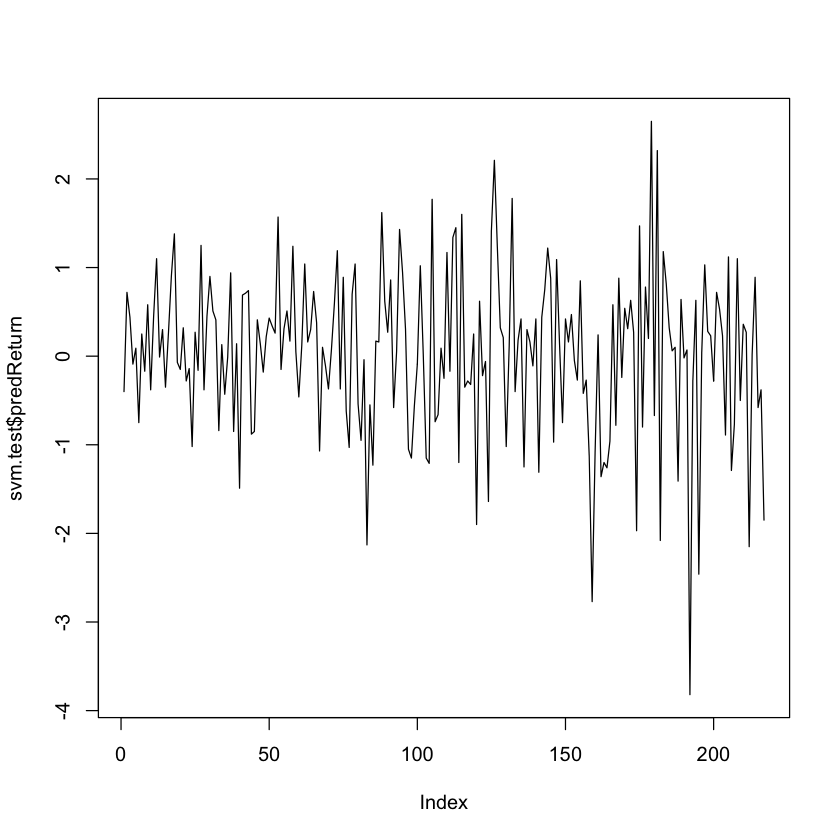

In [41]:
# Results
svm.test <- predictedReturn(test, svm.pred)

plot(svm.test$predReturn, type = "line")

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


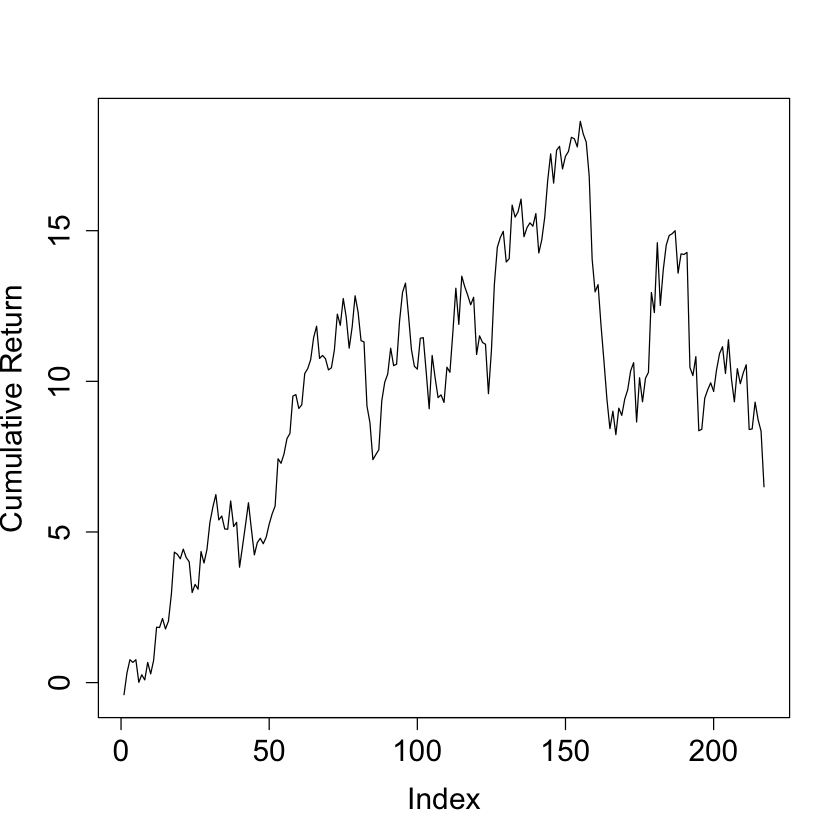

In [42]:
plot(svm.test$cumReturn, type="line",  # Cumulative Return
     ylab = "Cumulative Return", 
     cex.axis=1.5,
     cex.lab=1.5)

In [43]:
# Confusion Matrix
confusionmatrix.svm <- table(svm.test$candle.next.day, svm.test$pred)
print(confusionmatrix.svm)

      
       bear bull
  bear    1   90
  bull    3  123


In [44]:
# Calculating Accuracy
svm.error <- mean(svm.test$candle.next.day != svm.test$pred)
print(paste("Accuracy", 1 - svm.error))

[1] "Accuracy 0.571428571428571"


# Random Forest

In [45]:
?randomForest

No documentation for ‘randomForest’ in specified packages and libraries:
you could try ‘??randomForest’

In [46]:
install.packages("randomForest")
library("randomForest")


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpYDIZzS/downloaded_packages


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [47]:
# random forest
model.rf <- randomForest(factor(candle.next.day) ~ candle.type.current + candle.type.previous + 
    doji + position.to.ema7 + position.to.ema20 + ema7.to.ema20 + 
    daily.return, data = train, ntree = 20)

In [48]:
# prediction
rf.pred <- predict(model.rf, test)

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


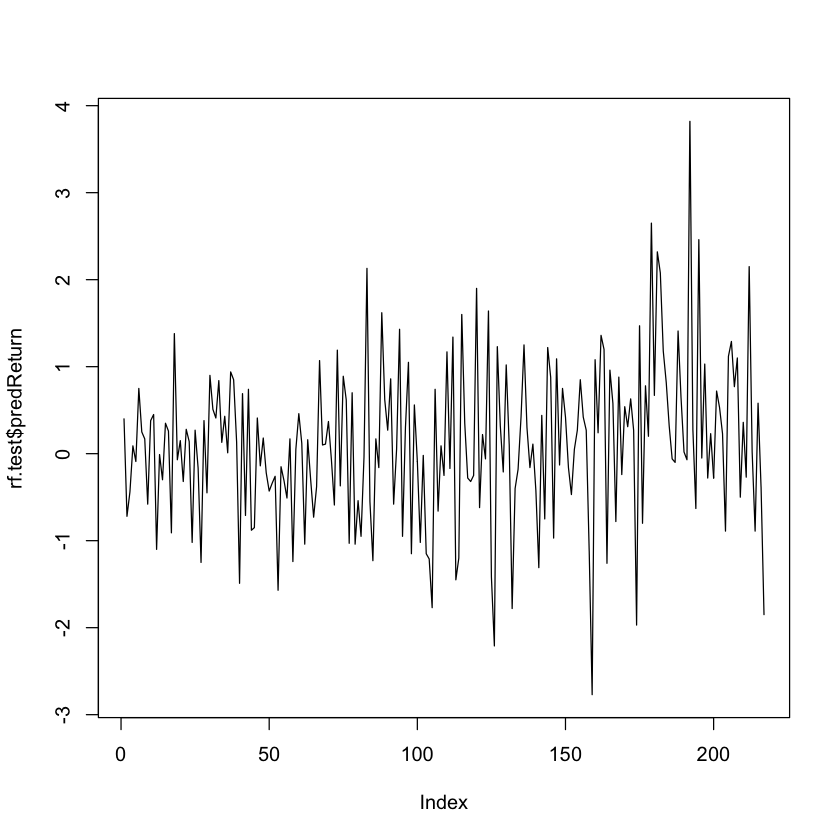

In [49]:
#results
rf.test <- predictedReturn(test, rf.pred)
plot(rf.test$predReturn, type = "line")

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


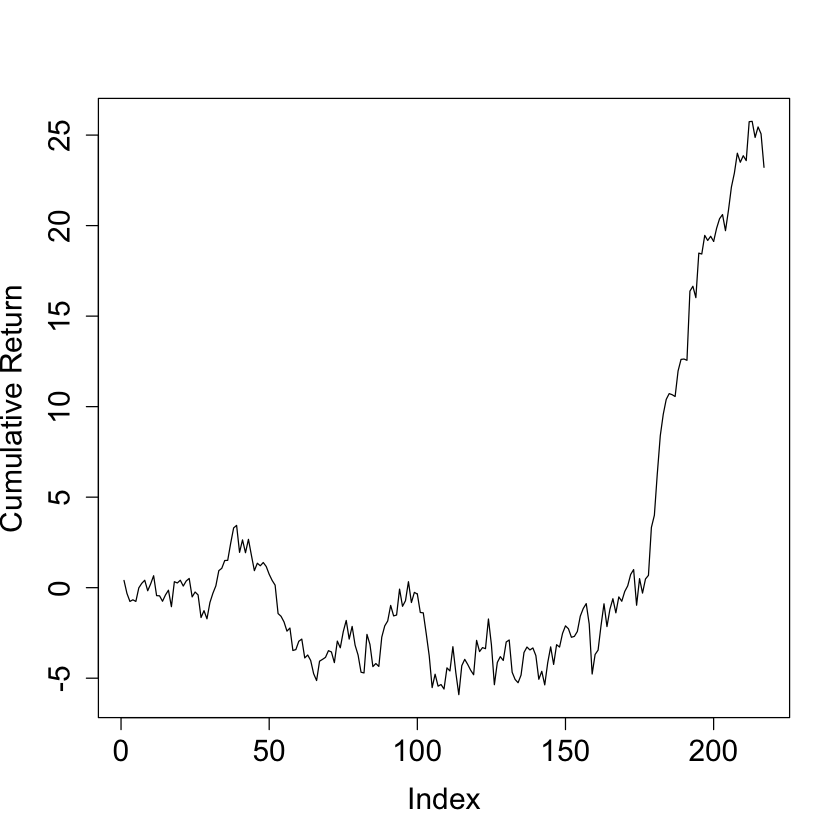

In [50]:
plot(rf.test$cumReturn, type="line",  # Cumulative Return
     ylab = "Cumulative Return", 
     cex.axis=1.5,
     cex.lab=1.5)

In [51]:
# Confusion Matrix
confusionmatrix.rf <- table(rf.test$candle.next.day, rf.test$pred)
print(confusionmatrix.rf)

      
       bear bull
  bear   49   42
  bull   54   72


In [52]:
# Calculating Accuracy
rf.error <- mean(rf.test$candle.next.day != rf.test$pred)
print(paste("Accuracy", 1 - rf.error))

[1] "Accuracy 0.557603686635945"


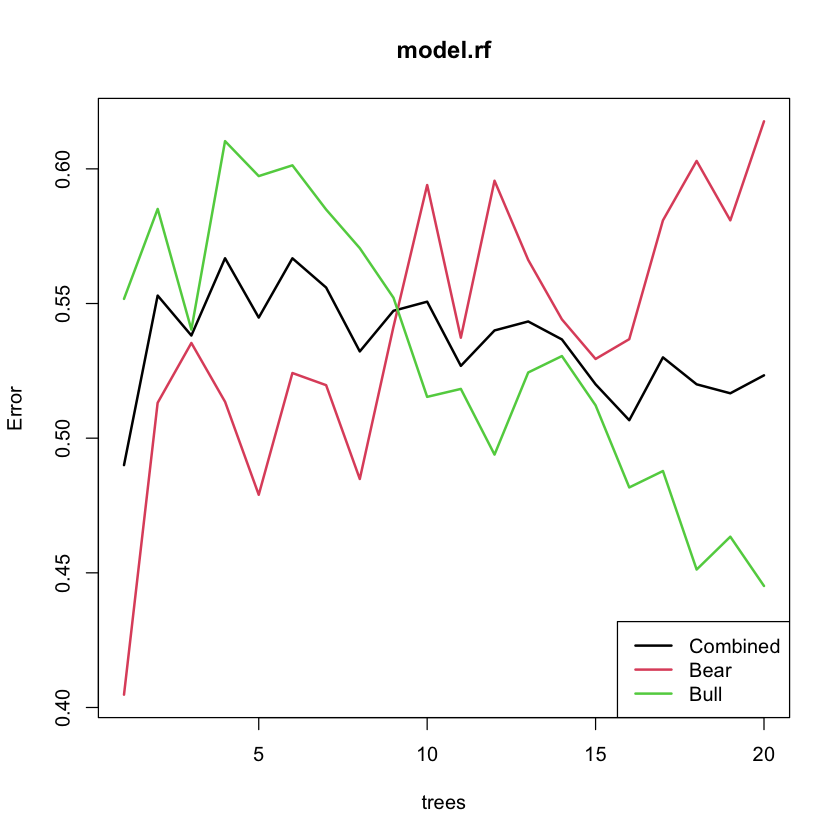

In [53]:
plot(model.rf, col = c(1, 2, 3), lty = c(1, 1, 1), lwd = 2)
# Add a legend
legend(x = "bottomright",          # Position
       legend = c("Combined", "Bear", "Bull"),  # Legend texts
       lty = c(1, 1, 1),           # Line types
       col = c(1, 2, 3),           # Line colors
       lwd = 2) 

In [54]:
tail(model.rf$err.rate)

,OOB,bear,bull
"[15,]",0.5200000,0.5294118,0.5121951
"[16,]",0.5066667,0.5367647,0.4817073
"[17,]",0.5300000,0.5808824,0.4878049
"[18,]",0.5200000,0.6029412,0.4512195
"[19,]",0.5166667,0.5808824,0.4634146
"[20,]",0.5233333,0.6176471,0.4451220


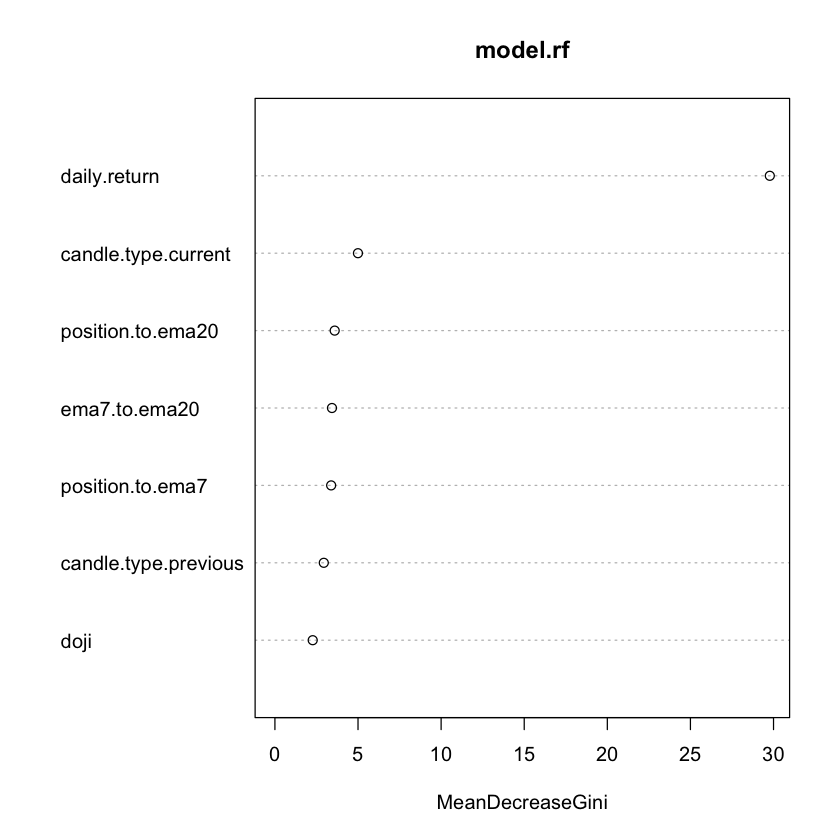

In [55]:
# The mean decrease in Gini coefficient is a measure of how each variable contributes to 
# the homogeneity of the nodes and leaves in the resulting random forest. 
# The higher the value of mean decrease accuracy or mean decrease Gini score, the higher the importance of the variable in the model.
varImpPlot(model.rf) 

# Backtesting and performance comparison of the models

In [56]:
nb.cumReturn <- nb.test$cumReturn
svm.cumReturn <- svm.test$cumReturn
rf.cumReturn <- rf.test$cumReturn
total.cumReturn = nb.cumReturn + svm.cumReturn + rf.cumReturn

In [57]:
names(nb.cumReturn) <- "cumreturn"
names(svm.cumReturn) <- "cumreturn"
names(rf.cumReturn) <- "cumreturn"

In [58]:
combined.cumReturn <- data.frame( 
                               nb.cumReturn,
                               svm.cumReturn,
                               rf.cumReturn
                              )
head(combined.cumReturn)

,nb.cumReturn,svm.cumReturn,rf.cumReturn
,<dbl>,<dbl>,<dbl>
1,0.40,-0.40,0.40
2,-0.32,0.32,-0.32
3,0.12,0.76,-0.76
4,0.21,0.67,-0.67
5,0.12,0.76,-0.76
6,0.87,0.01,-0.01


In [59]:
install.packages("ggplot2")
library("ggplot2")


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpYDIZzS/downloaded_packages


In [60]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

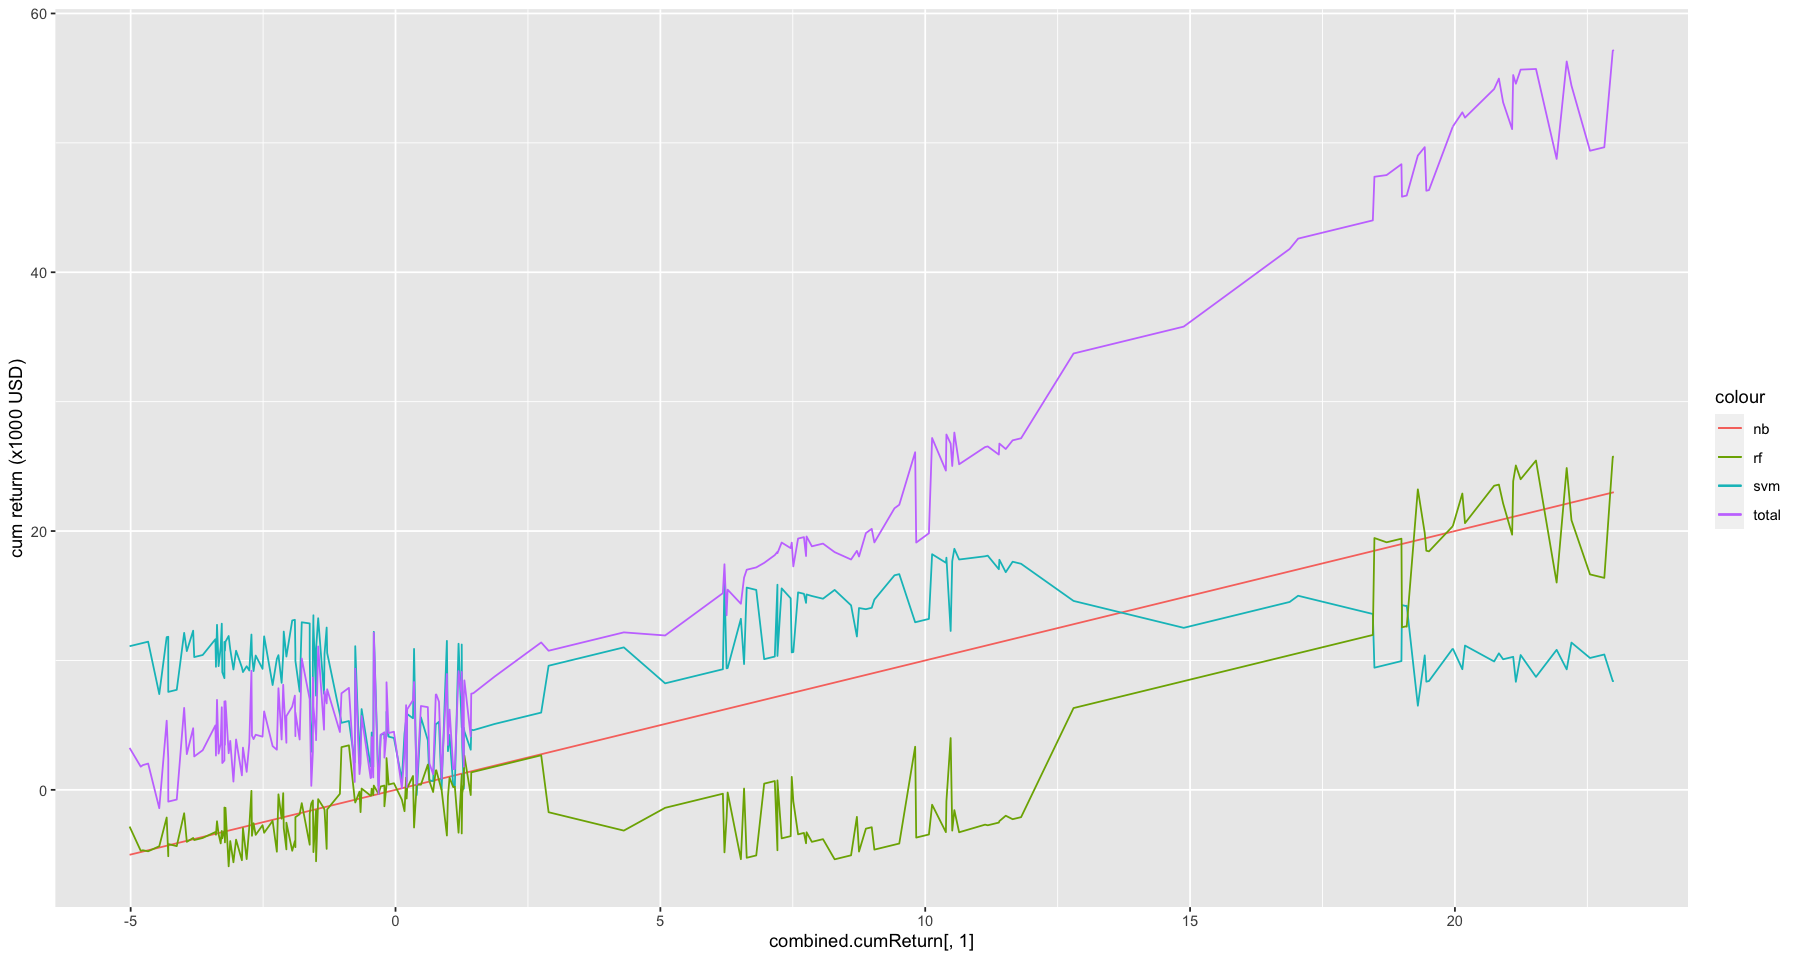

In [61]:
# plot the cumReturn of all the ML models

fig(15, 8)

print(ggplot(combined.cumReturn)
     + geom_line(aes(combined.cumReturn[,1], nb.cumReturn, colour = "nb"))
     + geom_line(aes(combined.cumReturn[,1], svm.cumReturn, colour = "svm"))
     + geom_line(aes(combined.cumReturn[,1], rf.cumReturn, colour = "rf"))
     + geom_line(aes(combined.cumReturn[,1], total.cumReturn, colour = "total"))
     + ylab("cum return (x1000 USD)")
     )